In [ ]:
#11.2.1 K-Means

In [1]:
!pip install kmeans_pytorch

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict
import matplotlib.pyplot as plt

In [3]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # chap11/data/iris.csv 데이터 불러오기

Saving Iris.csv to Iris.csv


In [8]:
df = pd.read_csv('/content/Iris.csv') #불러온 데이터의 경로 입력
df.info()
print('------------------------------------------')
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
------------------------------------------
      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  .

In [9]:
data=pd.get_dummies(df, columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [10]:
from sklearn.model_selection import train_test_split
x, y = train_test_split(data, test_size=0.2, random_state=123)

In [11]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(x)
y_scaled = scaler.fit(y).transform(y)

In [13]:
x = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)

In [14]:
print(x.size())
print(y.size())
print(x)

torch.Size([120, 8])
torch.Size([30, 8])
tensor([[ 1.2817e+00,  1.8862e+00, -5.8776e-01,  1.3314e+00,  9.2206e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [ 1.0277e+00,  1.8983e-01, -1.9762e+00,  7.0589e-01,  3.9617e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.0508e+00, -1.3854e+00,  3.3785e-01, -1.2275e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-1.7205e+00, -9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-2.8868e-01,  1.8983e-01, -1.9762e+00,  1.3724e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 4.2725e-01, -1.0218e+00, -1.7448e+00, -2.6082e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 1.3048e+00,  2.4920e+00,  1.7263e+00,  1.5020e+00,  1.0535e+00,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.6051e+00, -5.3718e-01,  1.9577e+00, -1.1707e+00, -1.0500e+00,
          1.4142e+00, -7

In [15]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean', device=device
)

running k-means on cuda:0..


[running kmeans]: 4it [00:00, 52.28it/s, center_shift=0.000000, iteration=4, tol=0.000100]


In [16]:
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1,
        1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0,
        2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1,
        1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1,
        0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2])
tensor([[-1.1850, -1.0022,  0.8757, -1.3028, -1.2384,  1.4142, -0.7071, -0.7071],
        [-0.0063,  0.1292, -0.6246,  0.2742,  0.1631, -0.7071,  1.4142, -0.7071],
        [ 1.1509,  0.9013, -0.2199,  1.0354,  1.0906, -0.7071, -0.7071,  1.4142]])


In [17]:
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)

predicting on cuda:0..


In [18]:
print(cluster_ids_y)

tensor([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2,
        0, 0, 0, 2, 2, 0])


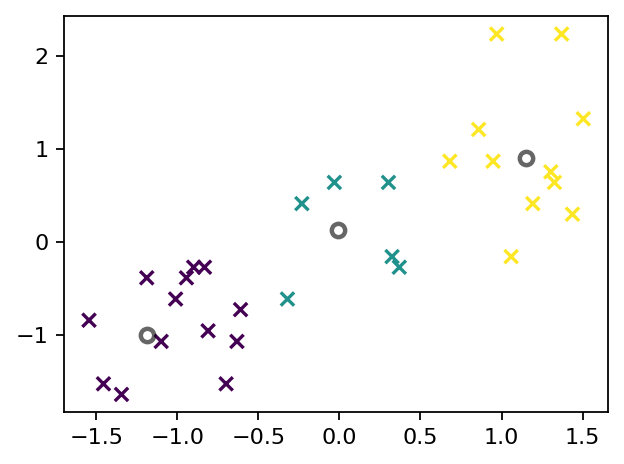

In [19]:
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(y[:, 0], y[:, 1],c=cluster_ids_y, cmap='viridis', marker='x')

plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)

plt.tight_layout()
plt.show()

In [ ]:
#11.2.2 Gaussian Mixture Model

In [20]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # chap11/data/data.npy 데이터 불러오기

Saving data.npy to data.npy


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X_train = np.load('data.npy')

[[1.60629419 1.3470999 ]
 [3.0363831  3.09828041]]


[[[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]

 [[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]]


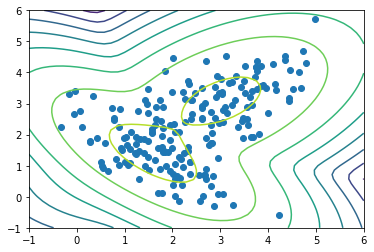

In [22]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

In [ ]:
#11.2.3 자기조직화 지도 (Self-Organizing Map, SOM)

In [23]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=b4da10cde34475e044088e78bb2bbcb85411581269f74eba1d8fe3c45eb75db1
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [24]:
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom  
from pylab import plot,axis,show,pcolor,colorbar,bone

digits = load_digits()
data = digits.data
labels = digits.target

SOM 초기화.

. SOM 진행 종료


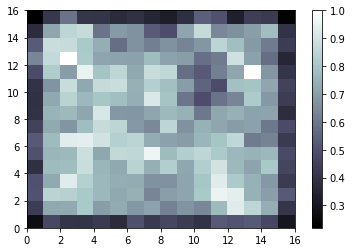

In [25]:
som = MiniSom(16,16,64,sigma=1.0,learning_rate=0.5)
som.random_weights_init(data)
print("SOM 초기화.")
som.train_random(data,10000) 
print("\n. SOM 진행 종료")

bone()
pcolor(som.distance_map().T) 
colorbar()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: F

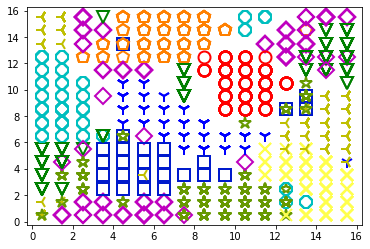

In [26]:
labels[labels == '0'] = 0
labels[labels == '1'] = 1
labels[labels == '2'] = 2
labels[labels == '3'] = 3
labels[labels == '4'] = 4
labels[labels == '5'] = 5
labels[labels == '6'] = 6
labels[labels == '7'] = 7
labels[labels == '8'] = 8
labels[labels == '9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt,xx in enumerate(data):
   w = som.winner(xx) 
   plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],    
   markerfacecolor='None', markeredgecolor=colors[labels[cnt]], 
   markersize=12, markeredgewidth=2)
show()